# Iris Flower Classification

## Introduction

Welcome to this Jupyter Notebook, where we will explore the Iris flower dataset and build a machine learning model to classify Iris flowers into different species based on their sepal and petal measurements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
iris_df = pd.read_csv(r'F:\CODSOFT\iris.csv')

## Dataset Description

The Iris dataset is a classic dataset in the field of machine learning and consists of 150 samples of Iris flowers. Each sample contains measurements of sepal length, sepal width, petal length, and petal width, along with the corresponding species label (setosa, versicolor, or virginica).

In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Analysis Steps


1. **Data Exploration**: We will start by loading the dataset and exploring its structure, features, and statistics. This step will help us gain insights into the data and understand its distribution.

In [7]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

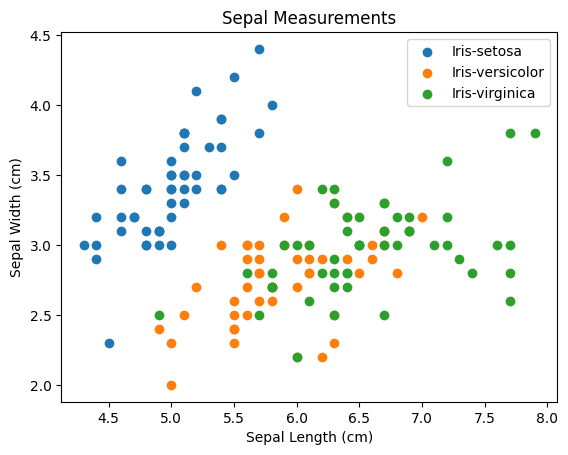

In [10]:
for species in iris_df['species'].unique():
    species_data = iris_df[iris_df['species'] == species]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Measurements')
plt.legend()
plt.show()

2. **Data Preprocessing**: In this step, we will handle any missing values, encode categorical variables, and split the data into training and testing sets. Data preprocessing is crucial for preparing the data for model training.


In [35]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

3. **Model Selection**: We will choose a suitable machine learning algorithm for classification. Common choices include logistic regression, decision trees, random forests, support vector machines, and k-nearest neighbors.

In [12]:
X = iris_df.drop('species', axis=1)
y = iris_df['species']

4. **Model Training**: We will train the selected model using the training dataset. During training, the model will learn from the input data and adjust its parameters to make accurate predictions.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

5. **Model Evaluation**: We will evaluate the performance of the trained model using the testing dataset. Evaluation metrics such as accuracy, precision, recall, and F1 score will help us assess the model's effectiveness.


In [18]:
y_pred = knn.predict(X_test_scaled)

In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



6. **Prediction**: Finally, we will use the trained model to predict the species of new Iris flowers. This step demonstrates the practical application of the machine learning model for real-world scenarios.

In [31]:
new_flower_measurements = [6.5, 2.8, 4.6, 1.5]

In [32]:
new_flower_df = pd.DataFrame([new_flower_measurements], columns=X.columns)
new_flower_scaled = scaler.transform(new_flower_df)

In [33]:
predicted_species = knn.predict(new_flower_scaled)

In [34]:
print("Predicted Species:", predicted_species)

Predicted Species: ['Iris-versicolor']


## Conclusion


In this notebook, we successfully explored the Iris flower dataset, built a machine learning model for classification, and evaluated its performance. By following the analysis steps outlined above, we gained valuable insights into the data and developed a predictive model that can classify Iris flowers into different species with high accuracy.

Thank you for joining this journey of exploration and learning!